# EXAMPLE: 
# USING coralign.util.quad.quadrant_energy_balance() FOR PUPIL PLANE ALIGNMENT

### IMPORTS

In [1]:
import sys
sys.path.insert(0,"../")

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

from coralign.util import shapes, mft, quad

### FUNCTIONS FOR GENERATION OF SIMULATED PUPIL PLANE

In [2]:
def gen_pupil(pupil_x_shear, pupil_y_shear, print_figure=False):
    # %% Pupil Generation

    Nbeam = 100
    nx = 150
    ny = nx
    xOffset = pupil_x_shear
    yOffset = pupil_y_shear
    diamInner = 0.20*Nbeam
    diamOuter = 1.00*Nbeam
    strutAngles = np.array([0, 90, 180, 270]) + 15
    strutWidth = 0.03*Nbeam
    pupil = shapes.simple_pupil(nx, ny, xOffset, yOffset, diamInner, diamOuter,
                                strutAngles=strutAngles, strutWidth=strutWidth)

    if print_figure:
        plt.figure(1)
        plt.imshow(pupil)
        plt.colorbar()
        plt.gca().invert_yaxis()
        plt.title("PUPIL")
        plt.pause(0.1)
        
    return pupil

In [3]:
# %% Apply noise to the images

def add_pupil_noise(pupil, image_noise_factor, print_figure=False):
    
    IpupilNoisy = pupil + image_noise_factor*np.random.randn(pupil.shape[0], pupil.shape[1])
    
    if print_figure:
        plt.figure(2)
        plt.imshow(IpupilNoisy)
        plt.colorbar()
        plt.gca().invert_yaxis()
        plt.title('PUPIL WITH NOISE')
        plt.pause(0.1)
        
    return IpupilNoisy

### EXAMPLE OF FUNCTION TO PERFORM PUPIL ALIGNMENT 

In [4]:
def simulate_quad_energy_balance_alignment(pupil_x_shear, pupil_y_shear, image_noise_factor, const, print_figure=False):
    
    pupil_x_center_true = 0
    pupil_y_center_true = 0
    
    pupil = gen_pupil(pupil_x_shear, pupil_y_shear)
    noisy_pupil = add_pupil_noise(pupil, image_noise_factor, print_figure)
    computed_pupil = noisy_pupil
    
    dim_x_diff_final, dim_y_diff_final = float("inf"), float("inf")
    iterations = 0
    
    while ((abs(pupil_x_center_true - pupil_x_shear) > 1/8 or abs(pupil_y_center_true - pupil_y_shear) > 1/8) and iterations < 20):

        dim_x_diff_final, dim_y_diff_final = quad.quadrant_energy_balance(computed_pupil, 75, 75, 100)
        
        pupil_x_shear -= dim_x_diff_final * const
        pupil_y_shear -= dim_y_diff_final * const
        
        computed_pupil = gen_pupil(pupil_x_shear, pupil_y_shear)
        
        computed_pupil = add_pupil_noise(computed_pupil,image_noise_factor, print_figure)

        iterations += 1
    
    return iterations

### EXAMPLE OF FUNCTION TO OPTIMIZE CONSTANT FOR PUPIL ALIGNMENT

In [5]:
def find_optimal_const(pupil_x_shear, pupil_y_shear, image_noise_factor, range_limit, print_figure=False, print_iteration_num=False):
    min_num_iterations = float("inf")
    optimal_const = -1
    
    for const in range(40, range_limit):
    
        num_iterations = simulate_quad_energy_balance_alignment(pupil_x_shear, pupil_y_shear, image_noise_factor, const)
        
        if(print_iteration_num):
            print("CONSTANT" , const, "TOOK", num_iterations, "ITERATIONS TO CONVERGE.")
        
        if num_iterations < min_num_iterations:
            min_num_iterations = num_iterations
            optimal_const = const
            
    return optimal_const, min_num_iterations

### MODIFIABLE PARAMETERS

In [6]:
# PUPIL
pupil_x_shear = -7  # in units of pupil diameters
pupil_y_shear = 5  # in units of pupil diameters

# NOISE FACTOR
image_noise_factor = 0.08

# CONSTANT
optimization_range_limit = 61

### GENERATE PUPIL (SIMULATION)

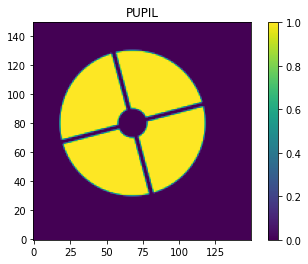

In [7]:
pupil = gen_pupil(pupil_x_shear, pupil_y_shear, True)

### OPTIMIZE CONSTANT VALUE FOR PUPIL ALIGNMENT

In [8]:
optimal_const, min_num_iterations = find_optimal_const(pupil_x_shear, pupil_y_shear, image_noise_factor, optimization_range_limit, print_iteration_num = True)
min_num_it_str = "(" + str(min_num_iterations) + " ITERATION(S))"
print("OPTIMAL CONSTANT:", optimal_const, min_num_it_str)

CONSTANT 40 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 41 TOOK 3 ITERATIONS TO CONVERGE.
CONSTANT 42 TOOK 3 ITERATIONS TO CONVERGE.
CONSTANT 43 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 44 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 45 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 46 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 47 TOOK 1 ITERATIONS TO CONVERGE.
CONSTANT 48 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 49 TOOK 2 ITERATIONS TO CONVERGE.
CONSTANT 50 TOOK 3 ITERATIONS TO CONVERGE.
CONSTANT 51 TOOK 4 ITERATIONS TO CONVERGE.
CONSTANT 52 TOOK 3 ITERATIONS TO CONVERGE.
CONSTANT 53 TOOK 4 ITERATIONS TO CONVERGE.
CONSTANT 54 TOOK 4 ITERATIONS TO CONVERGE.
CONSTANT 55 TOOK 4 ITERATIONS TO CONVERGE.
CONSTANT 56 TOOK 3 ITERATIONS TO CONVERGE.
CONSTANT 57 TOOK 4 ITERATIONS TO CONVERGE.
CONSTANT 58 TOOK 4 ITERATIONS TO CONVERGE.
CONSTANT 59 TOOK 5 ITERATIONS TO CONVERGE.
CONSTANT 60 TOOK 6 ITERATIONS TO CONVERGE.
OPTIMAL CONSTANT: 47 (1 ITERATION(S))


### SIMULATE ALIGNMENT OF PUPIL

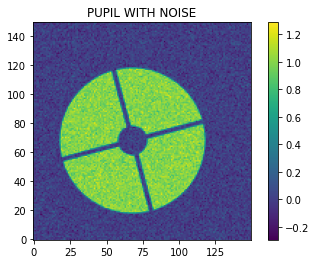

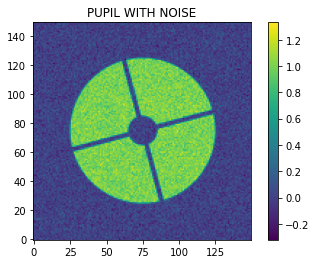

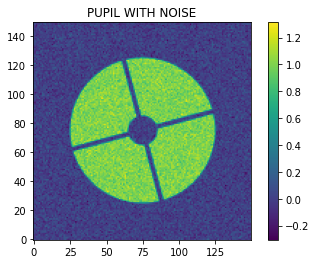

ITERATIONS UNTIL CONVERGENCE: 2


In [9]:
num_iterations = simulate_quad_energy_balance_alignment(pupil_x_shear, pupil_x_shear, image_noise_factor, optimal_const, True)
print("ITERATIONS UNTIL CONVERGENCE:", num_iterations)